# Naive Bayes Classifier

In [49]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.naive_bayes import MultinomialNB                                   # Para Modelo de Naive Bayers Multinomial
from sklearn.naive_bayes import GaussianNB                                      # Para Modelo de Naive Bayers Multinomial
from sklearn.naive_bayes import BernoulliNB                                     # Para Modelo de Naive Bayers Multinomial
from sklearn.metrics import recall_score, precision_score, f1_score             # Para medir rendimiento del modelo
from pickle import dump
from sklearn.model_selection import KFold

In [50]:
# importar datos
# Manejo de archivos
file_name = 'ML_input.xlsx'
current_dir = os.getcwd()
Rutabase = os.path.abspath(os.path.join(current_dir, os.pardir))
RESULTS_DIR = "\Results"
excel_filename = Rutabase + RESULTS_DIR +  '\ML_input.xlsx'
print('Analyzing document: ',excel_filename)
data = pd.read_excel(excel_filename)
data

Analyzing document:  c:\Users\felip\Documents\Universidad\1s2022\Proyecto_Electrico\Source\Results\ML_input.xlsx


,Socketing,G/B_flag,Test_Time,Bines_General,Bines_NLot,8,9,10,11,13,...,60,62,64,68,92,94,97,98,99,53
0,0.524246,1,0.673351,0.055872,0.536334,0.037736,0.023810,0.000000,0.03125,0.029412,...,0.0,0.0,0.00000,0.166667,0.000000,0.048048,0.000000,0.080645,0.000000,0.0
1,0.735618,0,0.613572,0.077850,0.542234,0.037736,0.047619,0.000000,0.03125,0.058824,...,0.0,0.0,0.03125,0.208333,0.000000,0.057057,0.000000,0.112903,0.052632,0.0
2,0.313007,1,0.642400,0.103403,0.187070,0.150943,0.047619,0.000000,0.03125,0.213235,...,0.0,0.0,0.12500,0.166667,0.000000,0.096096,0.805556,0.000000,0.157895,0.0
3,0.439883,0,0.587529,0.137561,0.157966,0.245283,0.047619,0.000000,0.03125,0.477941,...,0.0,0.0,0.12500,0.291667,0.000000,0.138138,0.833333,0.000000,0.157895,0.0
4,0.017803,1,0.617035,0.004766,0.398706,0.018868,0.000000,0.000000,0.00000,0.000000,...,0.0,0.0,0.00000,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463,0.159028,1,0.676215,0.162452,0.176964,0.000000,0.071429,0.000000,0.00000,0.029412,...,0.0,0.0,0.03125,0.041667,0.000000,0.015015,0.000000,0.032258,0.052632,0.0
2464,0.224259,0,0.557892,0.226930,0.181503,0.000000,0.095238,0.000000,0.00000,0.058824,...,0.0,0.0,0.06250,0.041667,0.000000,0.018018,0.000000,0.032258,0.105263,0.0
2465,0.007573,1,0.482279,0.010989,0.163959,0.000000,0.000000,0.032258,0.00000,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.003003,0.000000,0.000000,0.000000,0.0
2466,0.031487,1,0.708604,0.034821,0.156564,0.000000,0.023810,0.000000,0.00000,0.014706,...,0.0,0.0,0.00000,0.000000,0.070175,0.006006,0.166667,0.016129,0.000000,0.0


In [51]:
# Separar datos entre entrenamiento y pruebas
tag = data['G/B_flag']
data_train = data.drop(['G/B_flag'], axis=1)
print(data_train.shape)
print(tag.shape)

(2468, 35)
(2468,)


In [52]:
# Creación de modelo
classifier_multinomial = MultinomialNB()
classifier_gaussian = GaussianNB()
classifier_bernuilli = BernoulliNB()

# Entrenamiento del modelo
classifier_multinomial.fit(data_train, tag)
classifier_gaussian.fit(data_train, tag)
classifier_bernuilli.fit(data_train, tag)

# save the model
dump(classifier_multinomial, open('model_MULT.pkl', 'wb'))
dump(classifier_bernuilli, open('model_BERNU.pkl', 'wb'))
dump(classifier_gaussian, open('model_GAUS.pkl', 'wb'))

### Cross Validation

In [53]:
kf = KFold(n_splits = 10)
Bernuilli_score = []
Bernuilli_recall =[]
Bernuilli_precision = []
Bernuilli_f1 = []

Gaussian_score = []
Gaussian_recall =[]
Gaussian_precision = []
Gaussian_f1 = []

Multinomial_score = []
Multinomial_recall =[]
Multinomial_precision = []
Multinomial_f1 = []

for train_index, test_index in kf.split(data):
    # Recalculando modelos
    classifier_multinomial.fit(data_train.iloc[train_index], data.iloc[train_index,1])
    classifier_bernuilli.fit(data_train.iloc[train_index], data.iloc[train_index,1])
    classifier_multinomial.fit(data_train.iloc[train_index], data.iloc[train_index,1])

    # Rendimiento multinomial
    Multinomial_recall.append(recall_score(tag.iloc[test_index], classifier_multinomial.predict(data_train.iloc[test_index])))
    Multinomial_score.append(classifier_multinomial.score(data_train.iloc[test_index], tag.iloc[test_index]))
    Multinomial_precision.append(precision_score(tag.iloc[test_index], classifier_multinomial.predict(data_train.iloc[test_index])))
    Multinomial_f1.append(f1_score(tag.iloc[test_index], classifier_multinomial.predict(data_train.iloc[test_index])))

    # Rendimiento Gaussian
    Gaussian_recall.append(recall_score(tag.iloc[test_index], classifier_gaussian.predict(data_train.iloc[test_index])))
    Gaussian_score.append(classifier_gaussian.score(data_train.iloc[test_index], tag.iloc[test_index]))
    Gaussian_precision.append(precision_score(tag.iloc[test_index], classifier_gaussian.predict(data_train.iloc[test_index])))
    Gaussian_f1.append(f1_score(tag.iloc[test_index], classifier_gaussian.predict(data_train.iloc[test_index])))

    # Rendimiento Bernuilli
    Bernuilli_recall.append(recall_score(tag.iloc[test_index], classifier_bernuilli.predict(data_train.iloc[test_index])))
    Bernuilli_score.append(classifier_bernuilli.score(data_train.iloc[test_index], tag.iloc[test_index]))
    Bernuilli_precision.append(precision_score(tag.iloc[test_index], classifier_bernuilli.predict(data_train.iloc[test_index])))
    Bernuilli_f1.append(f1_score(tag.iloc[test_index], classifier_bernuilli.predict(data_train.iloc[test_index])))

print('Multinomial score: ', round(sum(Multinomial_score) / len(Multinomial_score),3)*100)
print('Multinomial recall: ', round(sum(Multinomial_recall) / len(Multinomial_recall),3)*100)
print('Multinomial presicion: ', round(sum(Multinomial_precision) / len(Multinomial_precision),3)*100)
print('Multinomial f1: ', round(sum(Multinomial_f1) / len(Multinomial_f1),2)*100)

print('----------------------------------')

print('Gaussian score: ', round(sum(Gaussian_score) / len(Gaussian_score),3)*100)
print('Gaussian recall: ', round(sum(Gaussian_recall) / len(Gaussian_recall),3)*100)
print('Gaussian presicion: ', round(sum(Gaussian_precision) / len(Gaussian_precision),3)*100)
print('Gaussian f1: ', round(sum(Gaussian_f1) / len(Gaussian_f1),3)*100)

print('----------------------------------')

print('Bernuilli score: ', round(sum(Bernuilli_score) / len(Bernuilli_score),3)*100)
print('Bernuilli recall: ', round(sum(Bernuilli_recall) / len(Bernuilli_recall),3)*100)
print('Bernuilli presicion: ', round(sum(Bernuilli_precision) / len(Bernuilli_precision),3)*100)
print('Bernuilli f1: ', round(sum(Bernuilli_f1) / len(Bernuilli_f1),3)*100)

Multinomial score:  82.1
Multinomial recall:  99.8
Multinomial presicion:  82.1
Multinomial f1:  90.0
----------------------------------
Gaussian score:  79.5
Gaussian recall:  88.1
Gaussian presicion:  87.0
Gaussian f1:  87.5
----------------------------------
Bernuilli score:  69.1
Bernuilli recall:  71.8
Bernuilli presicion:  88.1
Bernuilli f1:  78.9


### Estadísticas

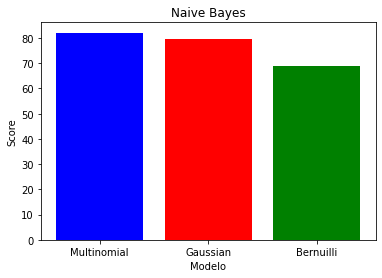

In [54]:
## Declaramos valores para el eje x
eje_x = ['Multinomial', 'Gaussian', 'Bernuilli']

eje_y = [round(sum(Multinomial_score) / len(Multinomial_score),3)*100, round(sum(Gaussian_score) / len(Gaussian_score),3)*100, round(sum(Bernuilli_score) / len(Bernuilli_score),3)*100]
plt.bar(eje_x, eje_y, color=['blue','red','green'])
plt.ylabel('Score')
plt.xlabel('Modelo')
plt.title('Naive Bayes')
plt.show()

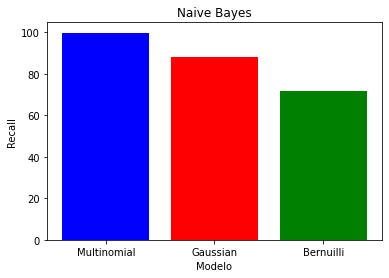

In [55]:
 
eje_y = [ round(sum(Multinomial_recall) / len(Multinomial_recall),3)*100, round(sum(Gaussian_recall) / len(Gaussian_recall),3)*100, round(sum(Bernuilli_recall) / len(Bernuilli_recall),3)*100]
plt.bar(eje_x, eje_y, color=['blue','red','green'])
plt.ylabel('Recall')
plt.xlabel('Modelo')
plt.title('Naive Bayes')
plt.show()


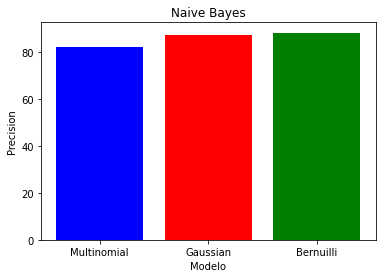

In [56]:
eje_y = [ round(sum(Multinomial_precision) / len(Multinomial_precision),3)*100, round(sum(Gaussian_precision) / len(Gaussian_precision),3)*100, round(sum(Bernuilli_precision) / len(Bernuilli_precision),3)*100]
plt.bar(eje_x, eje_y, color=['blue','red','green'])
plt.ylabel('Precision')
plt.xlabel('Modelo')
plt.title('Naive Bayes')
plt.show()

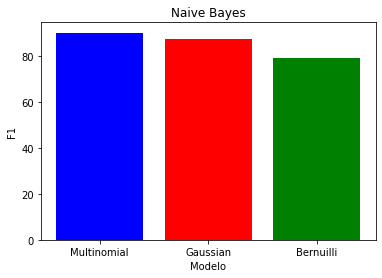

In [57]:
eje_y = [ round(sum(Multinomial_f1) / len(Multinomial_f1),3)*100, round(sum(Gaussian_f1) / len(Gaussian_f1),3)*100, round(sum(Bernuilli_f1) / len(Bernuilli_f1),3)*100]
plt.bar(eje_x, eje_y, color=['blue','red','green'])
plt.ylabel('F1')
plt.xlabel('Modelo')
plt.title('Naive Bayes')
plt.show()